In [17]:
%matplotlib qt5

import os
import pylab
import mne.io
import os.path
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from TFG_utils import take_vmrk_filename
from TFG_utils import take_vhdr_filename
from TFG_utils import Get_Start_End
from TFG_utils import spot_samples
from TFG_utils import get_potencias
import pandas as pd
from TFG_utils import ratios

import mne

In [18]:
folder="eeg_example"
ch=1 #channel to represent

vmrk_filename = take_vmrk_filename(folder)
vhdr_filename = take_vhdr_filename(folder)

eeg_object = mne.io.read_raw_brainvision(vhdr_filename) # Leer los datos
eeg_data = eeg_object.get_data() # Cargar los datos

Extracting parameters from eeg_example\Neuromarketing3850.vhdr...
Setting channel info structure...


In [19]:
eeg_data

array([[ 0.0112562 ,  0.01138095,  0.01146259, ..., -0.0056125 ,
        -0.00452065, -0.00345244],
       [-0.20467211, -0.20452885, -0.20438803, ..., -0.16212165,
        -0.1620069 , -0.16186281],
       [-0.38860893, -0.38808203, -0.38787422, ..., -0.05965178,
        -0.05909641, -0.05837648],
       ...,
       [ 0.0710443 ,  0.07114235,  0.07131583, ...,  0.09422232,
         0.09451621,  0.09487764],
       [-0.11247817, -0.11238896, -0.11233695, ..., -0.15871242,
        -0.15764303, -0.15662648],
       [-0.0543197 , -0.05420066, -0.05413757, ..., -0.115281  ,
        -0.11416767, -0.11312777]])

In [20]:
eeg = eeg_data*10e-6

In [21]:
eeg

array([[ 1.12561954e-07,  1.13809512e-07,  1.14625918e-07, ...,
        -5.61249713e-08, -4.52065198e-08, -3.45243964e-08],
       [-2.04672112e-06, -2.04528850e-06, -2.04388030e-06, ...,
        -1.62121646e-06, -1.62006899e-06, -1.61862808e-06],
       [-3.88608932e-06, -3.88082028e-06, -3.87874215e-06, ...,
        -5.96517761e-07, -5.90964053e-07, -5.83764838e-07],
       ...,
       [ 7.10442996e-07,  7.11423464e-07,  7.13158326e-07, ...,
         9.42223150e-07,  9.45162114e-07,  9.48776370e-07],
       [-1.12478165e-06, -1.12388956e-06, -1.12336954e-06, ...,
        -1.58712419e-06, -1.57643035e-06, -1.56626482e-06],
       [-5.43196988e-07, -5.42006558e-07, -5.41375699e-07, ...,
        -1.15280996e-06, -1.14167666e-06, -1.13127774e-06]])

In [22]:
len(eeg)

31

In [23]:
len(eeg[0])
#22 canales de EEG y 3 de EOG

240140

In [24]:
info=eeg_object.info
ch_names = eeg_object.ch_names
ch_number = len(ch_names)
fs=info['sfreq']

In [25]:
info = mne.create_info(ch_names, fs, ch_types=["eeg"]*31)
raw = mne.io.RawArray(eeg, info)
raw.set_montage("standard_1020")

Creating RawArray with float64 data, n_channels=31, n_times=240140
    Range : 0 ... 240139 =      0.000 ...   480.278 secs
Ready.
DigMontage is a superset of info. 63 in DigMontage will be ignored. The ignored channels are: {'F10', 'O10', 'F9', 'O9', 'Iz', 'AF6', 'P9', 'FT7', 'CP4', 'A1', 'A2', 'F1', 'FCz', 'PO7', 'T4', 'PO3', 'F2', 'C5', 'AF5', 'M1', 'AF3', 'PO8', 'T9', 'AF1', 'F6', 'AF4', 'AF10', 'C6', 'PO1', 'P6', 'FC4', 'T10', 'PO5', 'C1', 'M2', 'T3', 'AF8', 'PO4', 'F5', 'FC3', 'CP3', 'Cz', 'AFz', 'P10', 'PO9', 'AF7', 'CPz', 'P2', 'P1', 'TP7', 'P5', 'PO10', 'Fpz', 'PO6', 'PO2', 'AF2', 'POz', 'C2', 'T5', 'AF9', 'FT8', 'T6', 'TP8'}


<RawArray  |  None, n_channels x n_times : 31 x 240140 (480.3 sec), ~56.9 MB, data loaded>

In [26]:
raw_tmp = raw.copy()
raw_tmp.filter(1, None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1651 samples (3.302 sec)



<RawArray  |  None, n_channels x n_times : 31 x 240140 (480.3 sec), ~56.9 MB, data loaded>

In [11]:
ica = mne.preprocessing.ICA(method="infomax", fit_params=dict(extended=True),random_state=1)
ica.fit(raw_tmp)

Fitting ICA to data using 31 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Using all PCA components: 31
Computing Extended Infomax ICA
Fitting ICA took 140.8s.


<ICA  |  raw data decomposition, fit (infomax): 240140 samples, 31 components, channels used: "eeg">

In [27]:
ica.plot_components(inst=raw_tmp)

[<Figure size 1500x1400 with 20 Axes>, <Figure size 1500x1100 with 15 Axes>]

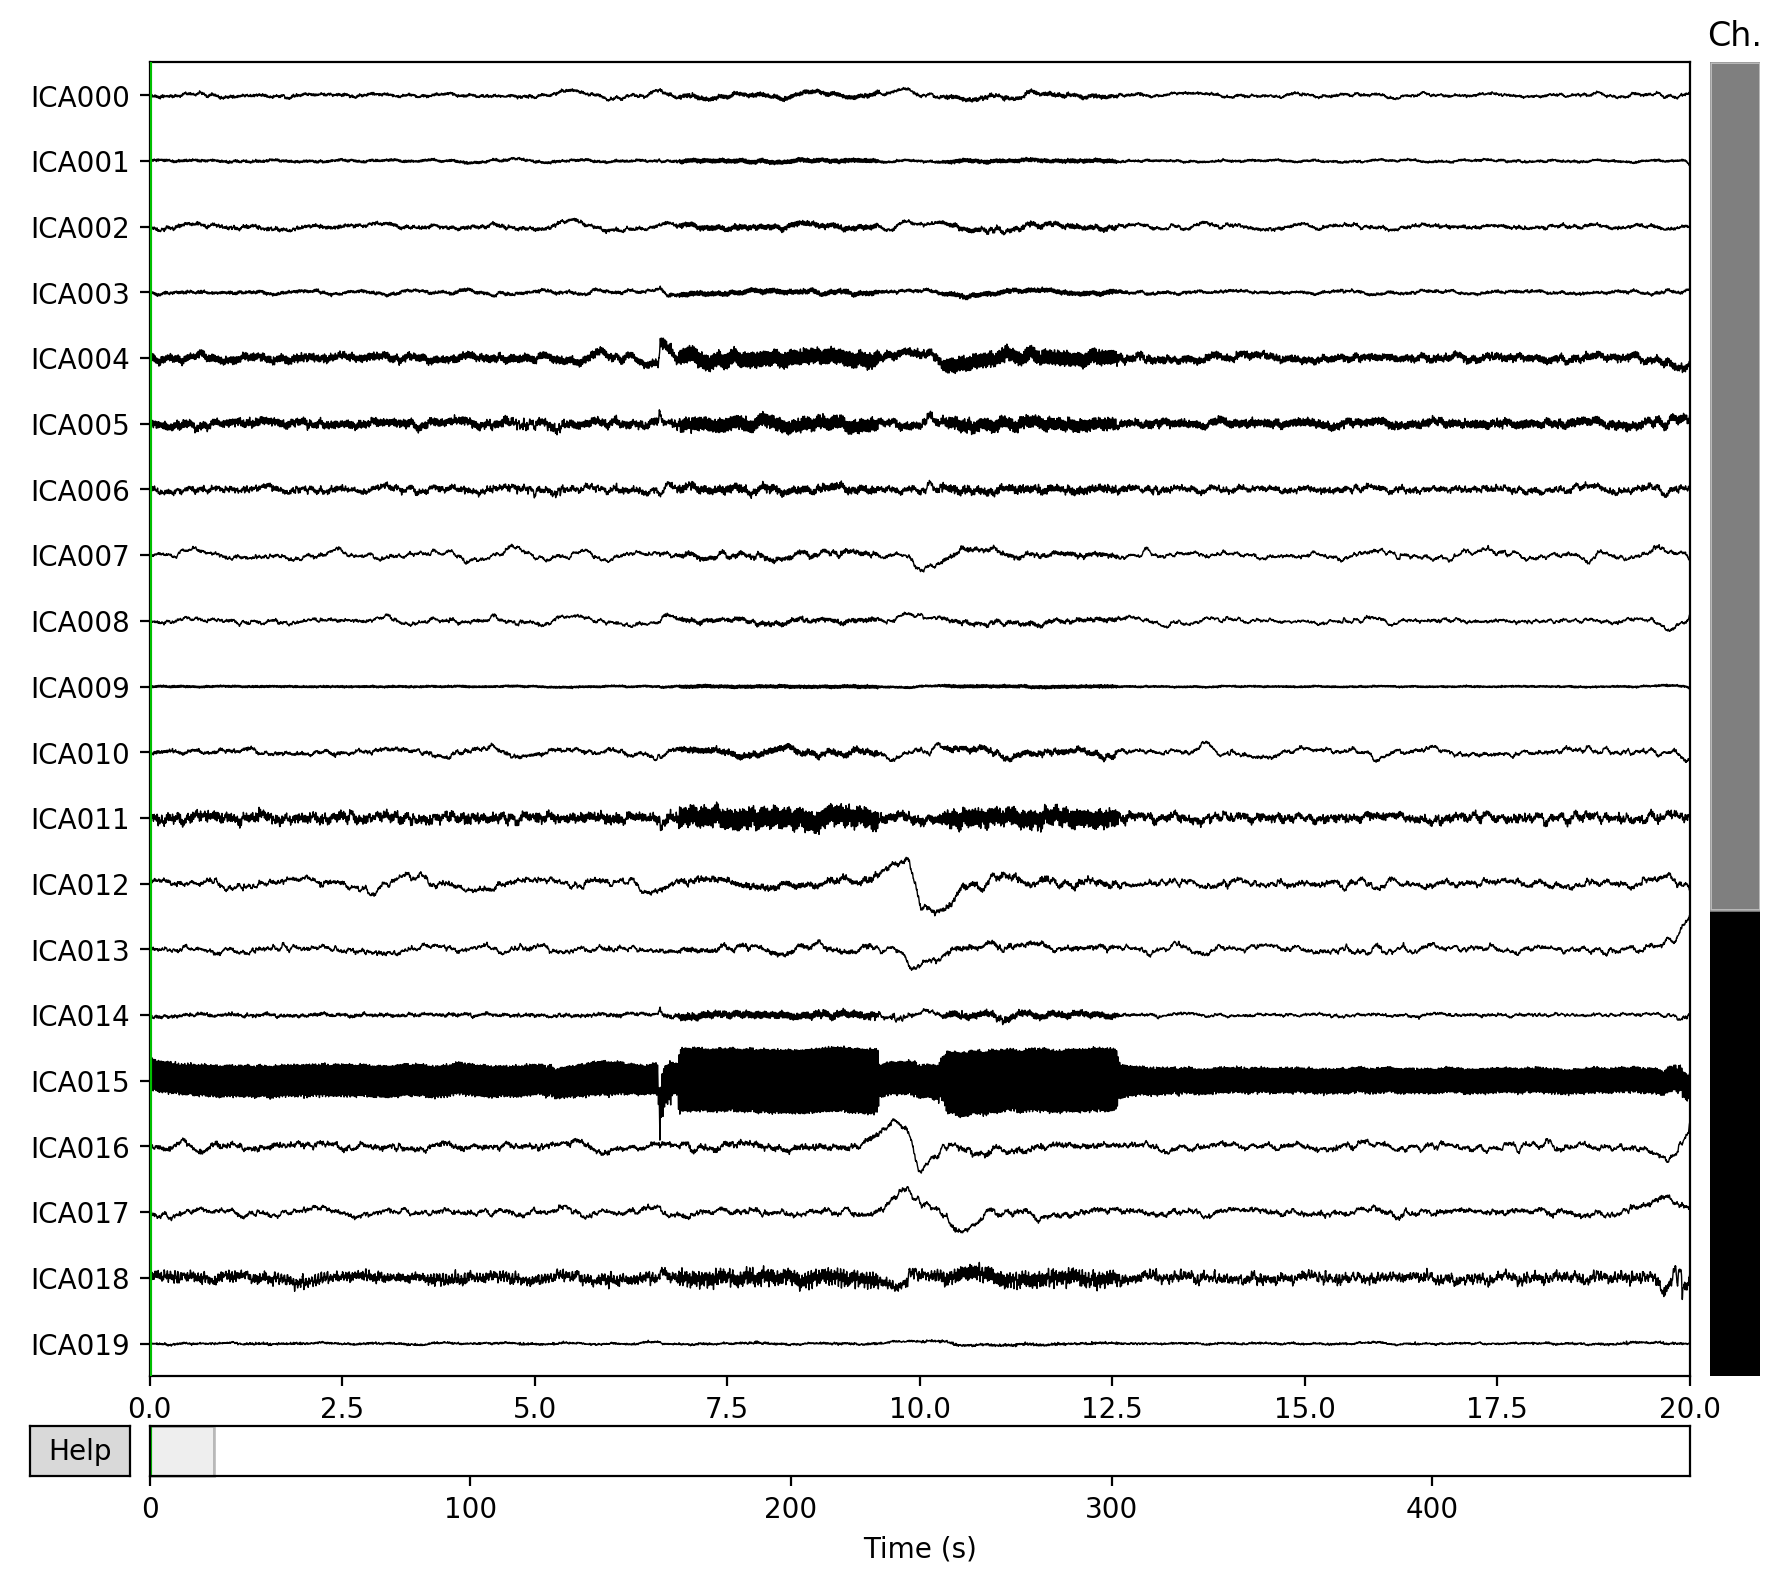

In [13]:
ica.plot_sources(inst=raw_tmp)

In [14]:
ica.exclude = [4]  # CUÁLES HAY QUE EXCLUIR???

In [15]:
raw_corrected = raw.copy()
ica.apply(raw_corrected)

Transforming to ICA space (31 components)
Zeroing out 1 ICA components


<RawArray  |  None, n_channels x n_times : 31 x 240140 (480.3 sec), ~56.9 MB, data loaded>

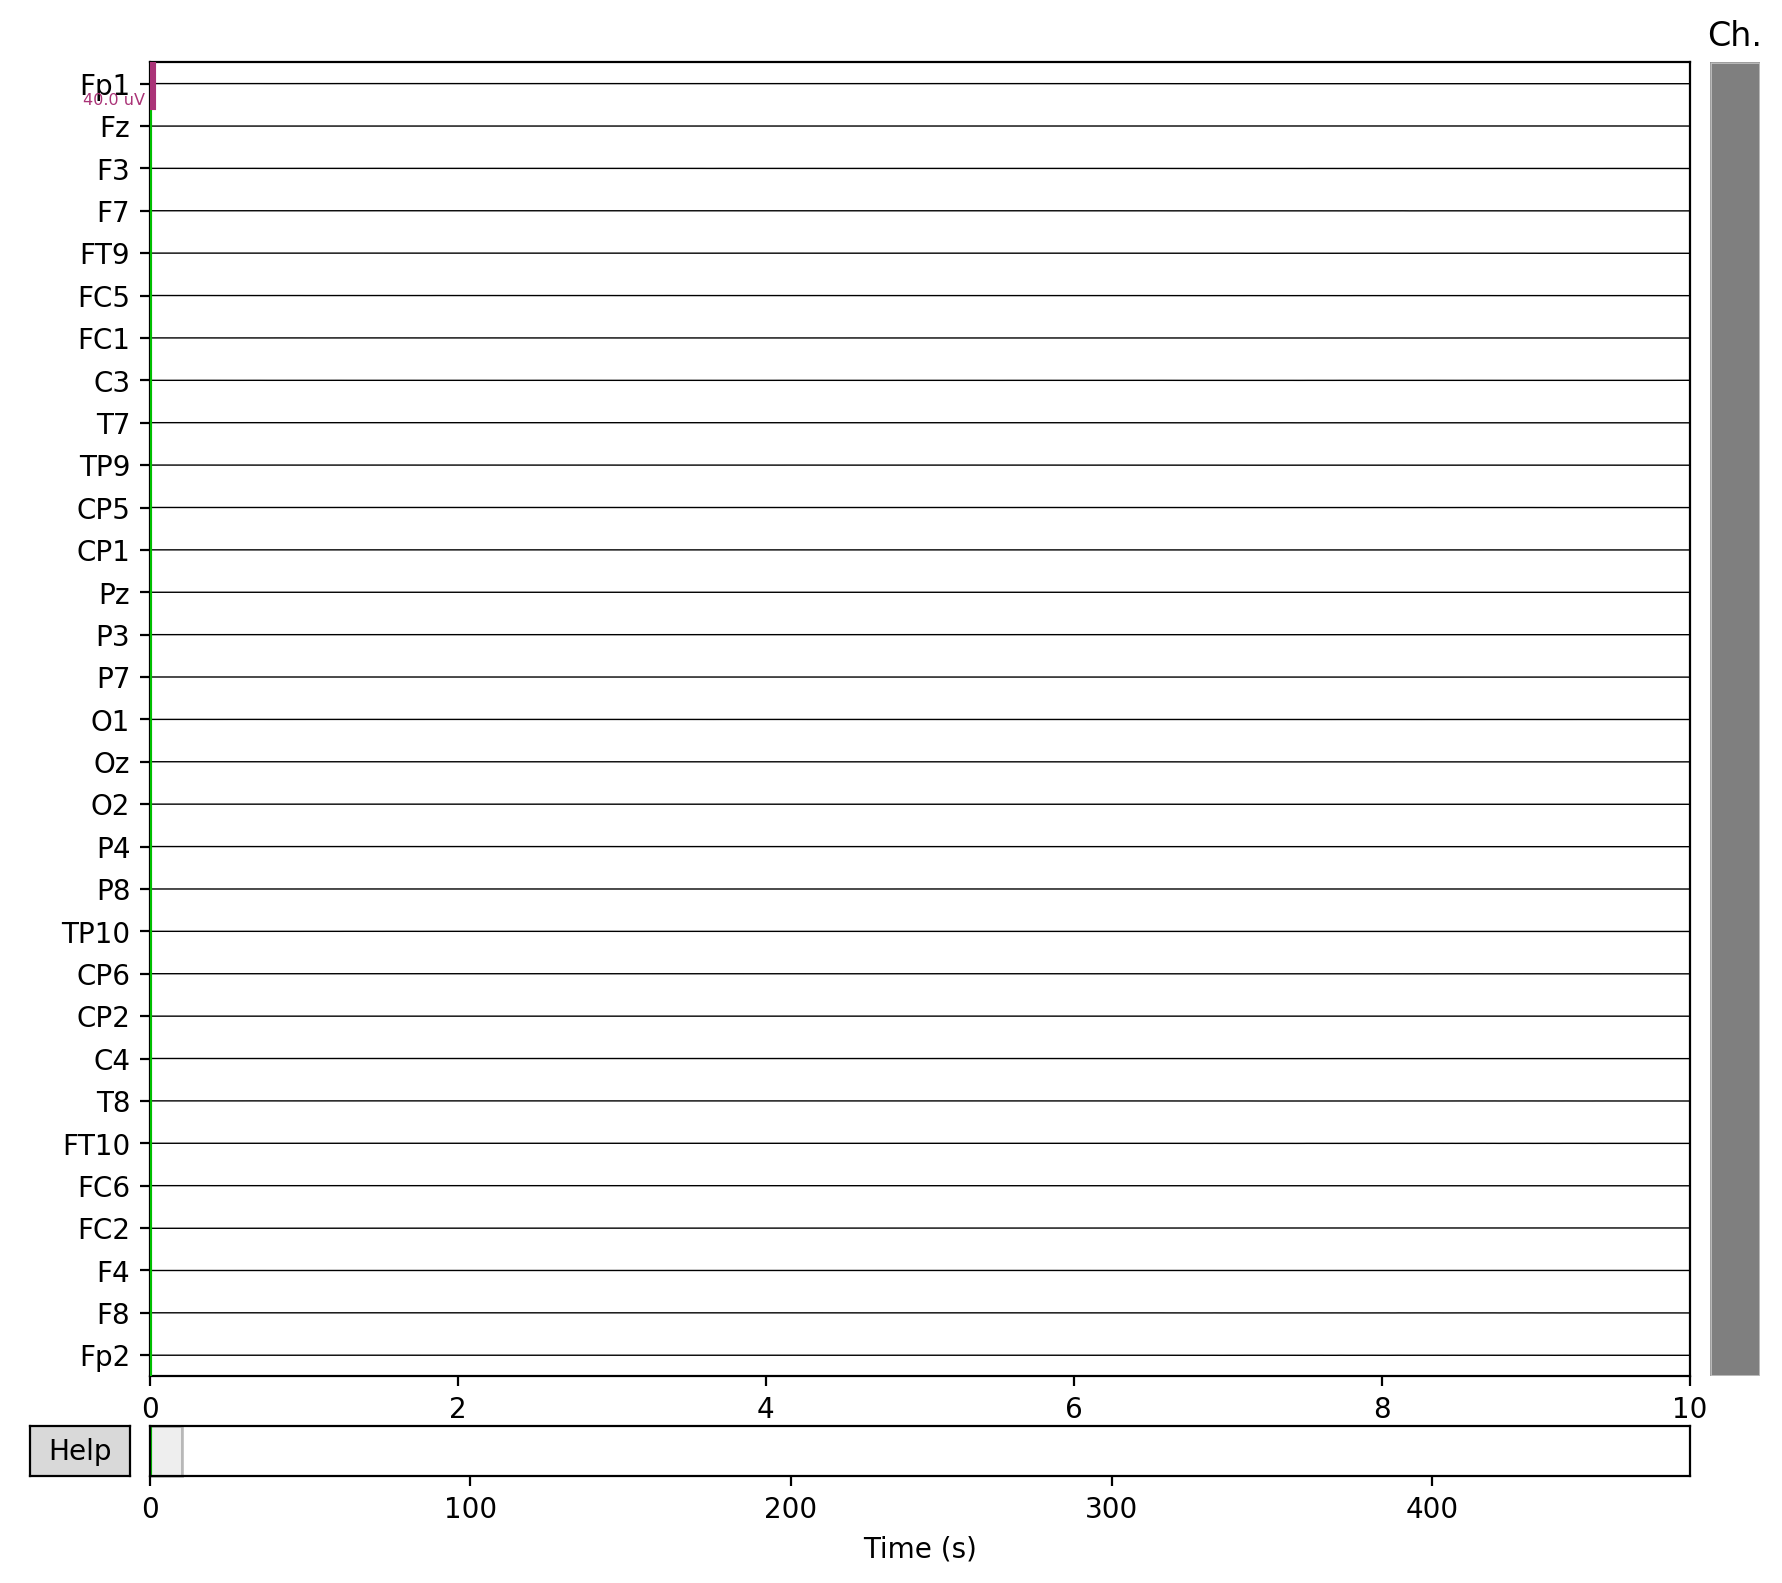

In [16]:
raw_corrected.plot(n_channels=ch_number)